In [11]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 9999

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [12]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [13]:
# TODO 返回矩阵的行数和列数
def shape(M):
    if M == []:
        return 0, 0
    elif M == None:
        return None, None
    else:
        if type(M[0]) is not list:
            return len(M), 1
        else:
            return len(M),len(M[0])

In [14]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [15]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    row, col = shape(M)
    for i in range(row):
        for j in range(col):
            M[i][j] = round(M[i][j], decPts)

In [16]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.056s

OK


## 1.4 计算矩阵的转置

In [17]:
# TODO 计算矩阵的转置
def transpose(M):
    row, col = shape(M)
    N = [([0]*row)for i in range(col)]
    for i in range(col):
            for j in range(row):
                N[i][j]=M[j][i]
    return N

In [18]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.013s

OK


## 1.5 计算矩阵乘法 AB

In [19]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    row_A, col_A = shape(A)
    row_B, col_B = shape(B)
    if col_A != row_B:
        raise ValueError
    N = [([0] * col_B)for i in range(row_A)]
    B = transpose(B)
    row_B, col_B = shape(B)
    for i in range(row_A):
        for j in range(row_B):
            N[i][j] = sum(x * y for (x, y) in zip(A[i], B[j]))
    return N

In [20]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.048s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [21]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    row_A, col_A = shape(A)
    N = []
    for i in range(row_A):
        N.append(A[i] + b[i])
    return N

In [22]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [23]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

In [24]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [25]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    try:
        assert scale != 0
        for i in range(len(M[r])):
            M[r][i] *= scale
    except AssertionError:
        raise ValueError

In [26]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [27]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    for i in range(len(M[r1])):
        M[r1][i] = M[r1][i] + M[r2][i] * scale

In [28]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为奇异矩阵，矩阵A为非奇异矩阵两种情况。

In [30]:
# 不要修改这里！
from helper import *
    
rank = 4
A = generateMatrix(rank,seed,singular=False)
b = np.ones(shape=(rank,1)) # it doesn't matter
printInMatrixFormat(rank,A,b)

    7,    5,    3,   -5 || 1    
   -4,    6,    2,   -2 || 1    
   -9,    4,   -5,    9 || 1    
   -9,  -10,    5,   -4 || 1    


请按照算法的步骤3，逐步推演增广矩阵的变换。

在下面列出每一次循环体执行之后的增广矩阵

增广矩阵
$Ab = \begin{bmatrix}
    -9 & -10 & 5 & -4 & 1\\
    7 & 5 & 3 & -5 & 1\\
    -4 & 6 & 2 & -2 & 1\\
    -9 & 4 & -5 & 9 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 10/9 & -5/9 & 4/9 & -1/9\\
   7 & 5 & 3 & -5 & 1\\
    -4 & 6 & 2 & -2 & 1\\
    -9 & 4 & -5 & 9 & 1\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 10/9 & -5/9 & 4/9 & -1/9\\
    0 & -25/9 & 62/9 & -73/9 & 16/9\\
    0 & 94/9 & -2/9 & -2/9 & 5/9\\
    0 & 14 & -10 & 13 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 10/9 & -5/9 & 4/9 & -1/9\\
    0 & 14 & -10 & 13 & 0\\
    0 & -25/9 & 62/9 & -73/9 & 16/9\\
    0 & 94/9 & -2/9 & -2/9 & 5/9\end{bmatrix}$
    
$ --> \begin{bmatrix}
   1 & 0 & 5/21 & -37/63 & -1/9\\
    0 & 1 & -5/7 & 13/14 & 0\\
    0 & 0 & 152/21 & -625/63 & 5/9\\
    0 & 0 & 103/21 & -697/126 & 16/9\end{bmatrix}$

$ --> \begin{bmatrix}
   1 & 0 & 0 & -833/3192 & -177/1368\\
    0 & 1 & 0 & -161/3192 & 25/456\\
    0 & 0 & 1 & -625/456 & 35/456\\
    0 & 0 & 0 & 1267/1064 & 213/152\end{bmatrix}$

$ --> \begin{bmatrix}
   1 & 0 & 0 & 0 & 1351/7602\\
    0 & 1 & 0 & 0 & 434/3801\\
    0 & 0 & 1 & 0 & 1835/1086\\
    0 & 0 & 0 & 1 & 213/181\end{bmatrix}$
    

In [31]:
# 不要修改这里！
rank = 4
A = generateMatrix(rank,seed,singular=True)
b = np.ones(shape=(rank,1)) # it doesn't matter

printInMatrixFormat(rank,A,b)

   -7,   -3,    1,   -9 || 1    
    0,    0,    0,    0 || 1    
   -2,    7,    7,   -3 || 1    
    8,   -5,   -6,    3 || 1    


请按照算法的步骤3，逐步推演增广矩阵的变换。

在下面列出每一次循环体执行之后的增广矩阵

增广矩阵
$ Ab = \begin{bmatrix}
    8 & -5 & -6 & 3 & 1\\
    -7 & -3 & 1 & -9 & 1\\
    -2 & 7 & 7 & -3 & 1\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & -5/8 & -3/4 & 3/8 & 1/8\\
    -7 & -3 & 1 & -9 & 1\\
    -2 & 7 & 7 & -3 & 1\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & -5/8 & -3/4 & 3/8 & 1/8\\
    0 & -59/8 & -17/4 & -51/8 & 15/8\\
    0 & 23/4 & 11/2 & -9/4 & 5/4\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & -23/59 & 54/59 & -2/59\\
    0 & 1 & 34/59 & 51/59 & -15/59\\
    0 & 0 & 129/59 &-426/59 & 160/59\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
   1 & 0 & 0 & -16/43 & 58/129\\
    0 & 1 & 0 & 119/43 & -125/129\\
    0 & 0 & 1 &-142/43 & 160/129\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$



### 2.3.3 实现 Gaussian Jordan 消元法

In [32]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    row_A, col_A = shape(A)
    row_b, col_b = shape(b)
    if row_A != row_b:  # 检查A，b是否行数相同
        return None
    N = augmentMatrix(A, b)  # 构造增广矩阵Ab
    for col in range(col_A):
        col_list = []
        for row in range(col, row_A):  # 只看当前列对角线及以下的行
            col_list.append(abs(N[row][col]))  # 取绝对值
        max_in_col_list = max(col_list)
        if max_in_col_list < epsilon:  # 奇异矩阵
            return None
        index_of_max_row = col_list.index(max_in_col_list) + col
        swapRows(N, col, index_of_max_row)
        make_it_one = 1. / N[col][col]
        scaleRow(N, col, make_it_one)
        for row in range(row_A):
            if row == col:
                continue
            else:
                make_it_zero = (-1.) * N[row][col]
                addScaledRow(N, row, col, make_it_zero)
#         matxRound(N, decPts)
    result = []
    for i in range(row_A):
        result.append(N[i][-1:])
    return result

In [33]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 1.774s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

如果矩阵A的行列式$|A|$等于0，则A为奇异矩阵。

行列式$|A|$由第一列展开：
$$|A| = \sum_{i=1}^n a_{i1}A_{i1} $$
其中，n表示A为n阶方阵（如果A不是方阵，就谈不上奇异或非奇异矩阵）。
$A_{i1}$表示$a_{i1}$的代数余子式。

第一列中只有$a_{11} = 1$，其余$a_{i1} = 0（i \neq 1）$

所以，
$$|A| = a_{11}A_{11} = A_{11}$$
将单位矩阵$I$包含的各列如上述依次展开，最后得到：
$$|A| = |Y| = \left\lvert \matrix{0 \dots \cr\vdots& \cr 0 \dots} \right\rvert = 0$$
所以A是奇异矩阵。

# 3  线性回归

## 3.1 随机生成样本点

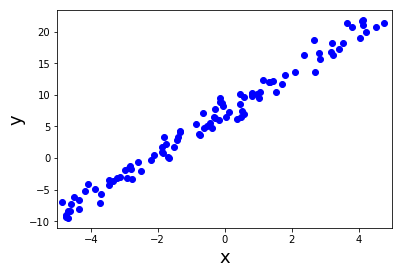

In [34]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

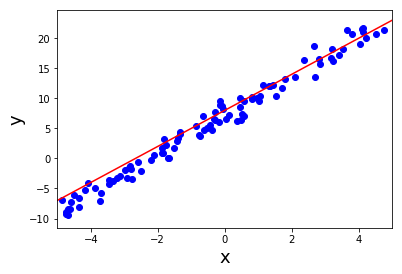

In [35]:
#TODO 请选择最适合的直线 y = kx + b
k = 3
b = 8

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [k*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [36]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    sum = 0
    for i in range(len(X)):
        sum += (Y[i] - m * X[i] - b) ** 2
    return sum / len(X)

print(calculateMSE(X,Y,3,8))

2.59943969031


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

目标函数：
$$
E = 0.5 * ((1 - m - b)^2 + (2 - 2m - b)^2 + (2 - 3m - b)^2)\\
    4.5 + 7m^2 + 1.5b^2 - 5b - 11m + 6mb
$$

二元二次方程组：
$$
\begin{cases}
\displaystyle
14m + 6b -11 = 0\\
\\
\displaystyle
6m + 3b -5 = 0 \\
\end{cases}
$$

最优参数：
$$
m = 1/2 \\
b = 2/3
$$

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:


令$f(x) = mx + b$，

所以，$f(X) = Xh$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = \frac{\partial E}{\partial h}
$$

$$
E(h) = \frac{1}{2}\sum_{i=1}^n (y_i-h x_i)^2
     = \frac{1}{2}(Y - hX)^2
$$
所以
$$
\frac{\partial E}{\partial h}
= -X(Y-hX)
= -X^TY+hX^TX
$$

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [39]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
def linearRegression(X,Y):
    row, col = shape(X)

    N = [[] for i in range(row)]
    for i in range(row):
        N[i].append(X[i])
    one_mat = [[1.]] * row
    X_new = augmentMatrix(N, one_mat)
    X_t = transpose(X_new)

    left_side = matxMultiply(X_t, X_new)

    Y_new = [[] for i in range(row)]
    for i in range(row):
        Y_new[i].append(Y[i])

    right_side = matxMultiply(X_t, Y_new)

    h = gj_Solve(left_side, right_side)
    return h[0], h[1]

m,b = linearRegression(X,Y)
print(m,b)

([3.237908973342472], [7.1898874152941294])


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  """


你求得的回归结果是什么？它足够好了吗？请使用运行以下代码将它画出来。

NameError: name 'y' is not defined

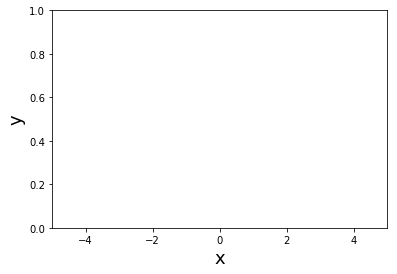

In [43]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(x,y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()